In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# reading the csv file
df = pd.read_csv("https://gitlab.com/healthcare2/process-mining-tutorial/-/raw/master/ArtificialPatientTreatment.csv")

In [2]:
# stripping the white space from the columns names and columns
df.columns = [x.strip() for x in df.columns.to_list()]
for col in df.columns:
  df[f'{col}'] = df[f'{col}'].str.strip()

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
# overview of the table
df.dtypes

,0
patient,object
action,object
org:resource,object
DateTime,datetime64[ns]


In [5]:
df.head(15)

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
5,patient 0,Final consult,Dr. Ben,2017-01-09 08:29:28
6,patient 1,First consult,Dr. Anna,2017-01-02 12:50:35
7,patient 1,Physical test,Nurse Jesse,2017-01-02 13:59:14
8,patient 1,Blood test,Lab,2017-01-02 14:20:19
9,patient 1,X-ray scan,Team 1,2017-01-06 09:13:40


In [6]:
df.shape

(690, 4)

In [7]:
# let's undertsnad our data
# there are 100 cases in a data
len(df.patient.unique())

100

In [8]:
# here is a full list of the ativities, witch includes in cases
df.action.unique()

array(['First consult', 'Blood test', 'Physical test', 'Second consult',
       'Surgery', 'Final consult', 'X-ray scan', 'Medicine'], dtype=object)

In [9]:
# additinal information recorded in event log
df['org:resource'].unique()

array(['Dr. Anna', 'Lab', 'Nurse Jesse', 'Dr. Charlie', 'Dr. Ben',
       'Team 1', 'Pharmacy', 'Team 2', 'Nurse Corey', 'Dr. Bob',
       'Dr. Rudy', 'Dr. Alex', 'Dr. Quinn'], dtype=object)

## Process mining

In [10]:
# installing the pm4py package
!pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=6486e991a47248710dc0d18480233bfefd9effca79f6c71335d00d0bd6c1e992
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [12]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter

# converting the pandas df to the event log
log_dataframe = pm4py.format_dataframe(df, case_id='patient', activity_key='action',
                                    timestamp_key='DateTime')

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [13]:
log_dataframe.head()

,patient,action,org:resource,DateTime,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,patient 0,First consult,2017-01-02 11:40:11,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,patient 0,Blood test,2017-01-02 12:47:33,1,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,patient 0,Physical test,2017-01-02 12:53:50,2,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,patient 0,Second consult,2017-01-02 16:21:06,3,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,patient 0,Surgery,2017-01-05 13:23:09,4,0


In [14]:
# define the start and end activities
start_activities = pm4py.get_start_activities(log_dataframe)
end_activities = pm4py.get_end_activities(log_dataframe)

In [15]:
# since it is sintetically generated data - we have 100 completed cases
start_activities, end_activities

({'First consult': 100}, {'Final consult': 100})

In [16]:
# lets review the variability of the cases
variants = pm4py.get_variants(
    log_dataframe,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

In [17]:
# print sorted variants
{k: v for k, v in sorted(variants.items(), key=lambda item: item[1])}

{('First consult',
  'Blood test',
  'Physical test',
  'Second consult',
  'Surgery',
  'Final consult'): 2,
 ('First consult',
  'Physical test',
  'Blood test',
  'Second consult',
  'Surgery',
  'Final consult'): 2,
 ('First consult',
  'X-ray scan',
  'Physical test',
  'Blood test',
  'Second consult',
  'Surgery',
  'Final consult'): 2,
 ('First consult',
  'Physical test',
  'Blood test',
  'Second consult',
  'Medicine',
  'Final consult'): 3,
 ('First consult',
  'Blood test',
  'Physical test',
  'Second consult',
  'Medicine',
  'Final consult'): 3,
 ('First consult',
  'Physical test',
  'X-ray scan',
  'Blood test',
  'Second consult',
  'Surgery',
  'Final consult'): 3,
 ('First consult',
  'Blood test',
  'Physical test',
  'X-ray scan',
  'Second consult',
  'Surgery',
  'Final consult'): 3,
 ('First consult',
  'Physical test',
  'Blood test',
  'X-ray scan',
  'Second consult',
  'Surgery',
  'Final consult'): 4,
 ('First consult',
  'X-ray scan',
  'Blood test',
  '

In [18]:
# all case duration
# computes durations of business hours by default; otherwise, uses calendar time.
case_durations = pm4py.get_all_case_durations(
    log_dataframe,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

In [19]:
# just out of curriousity decided to calcualte it manualy and compare it with the library output
newdf = df.groupby('patient', as_index=False)['time:timestamp'].agg(['min', 'max'])

In [20]:
newdf['diff'] = newdf['max'] - newdf['min']

In [21]:
newdf['diff'].describe()

,diff
count,100
mean,9 days 13:50:56.440000
std,3 days 13:03:21.195525489
min,1 days 01:34:04
25%,7 days 00:38:59.750000
50%,9 days 11:40:33.500000
75%,11 days 21:09:11.250000
max,17 days 02:43:04


In [22]:
# returns the sorted list of the cases, and time in second in my case -> smallest in a log
# so convert it into the hours by dividing to 3600
import numpy as np
hours = [i//3600 for i in case_durations]
days = [i//24 for i in hours]
print(min(hours), max(hours), np.mean(hours))
print(min(days), max(days), np.mean(days))
# we got similar results by the manual calculations - confirmed

25.0 410.0 229.34
1.0 17.0 9.06


In [23]:
#durationof individual case - for example patient 0
duration = pm4py.get_case_duration(
    log_dataframe,
    'patient 0',
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

In [24]:
# dusration is in seconds
duration

593357.0

In [25]:
# llm models in abstracting & describing event logs
# here as a directed follow graph
print(pm4py.llm.abstract_dfg(log_dataframe))

If I have a process with flow:

Second consult -> Medicine ( frequency = 80  performance = 32710.838 )
Medicine -> Final consult ( frequency = 80  performance = 184820.638 )
First consult -> Blood test ( frequency = 40  performance = 12757.125 )
Physical test -> Second consult ( frequency = 36  performance = 239256.944 )
Blood test -> Physical test ( frequency = 35  performance = 45691.286 )
Physical test -> Blood test ( frequency = 33  performance = 3961.212 )
First consult -> Physical test ( frequency = 33  performance = 132227.788 )
Blood test -> Second consult ( frequency = 33  performance = 226172.455 )
X-ray scan -> Physical test ( frequency = 32  performance = 22734.906 )
Blood test -> X-ray scan ( frequency = 32  performance = 260529.281 )
X-ray scan -> Second consult ( frequency = 31  performance = 286292.097 )
Physical test -> X-ray scan ( frequency = 31  performance = 190922.129 )
X-ray scan -> Blood test ( frequency = 27  performance = 2595.852 )
First consult -> X-ray scan

In [26]:
# here llm used for the describing all the varience of the log, with it frequencies and performance.
print(pm4py.llm.abstract_variants(log_dataframe))

If I have a process with the following process variants:

 First consult -> Blood test -> X-ray scan -> Physical test -> Second consult -> Medicine -> Final consult ( frequency = 18  performance = 726449.222 )
 First consult -> Blood test -> Physical test -> X-ray scan -> Second consult -> Medicine -> Final consult ( frequency = 14  performance = 795889.286 )
 First consult -> X-ray scan -> Physical test -> Blood test -> Second consult -> Medicine -> Final consult ( frequency = 12  performance = 738731.167 )
 First consult -> Physical test -> X-ray scan -> Blood test -> Second consult -> Medicine -> Final consult ( frequency = 11  performance = 849734.455 )
 First consult -> Physical test -> Blood test -> X-ray scan -> Second consult -> Medicine -> Final consult ( frequency = 10  performance = 859611.500 )
 First consult -> X-ray scan -> Blood test -> Physical test -> Second consult -> Medicine -> Final consult ( frequency = 9  performance = 771375.778 )
 First consult -> X-ray scan ->

### Process discovery

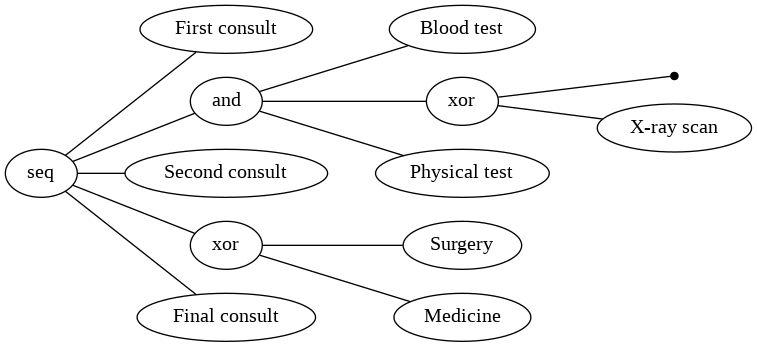

''

In [27]:
# inductive miner
# let's print the process tree -> please see the medium post on how to read it
process_tree = pm4py.discover_process_tree_inductive(log_dataframe)
pm4py.vis.view_process_tree(process_tree)
pm4py.vis.save_vis_process_tree(process_tree, "PrecessTreeInductiveMiner.png")


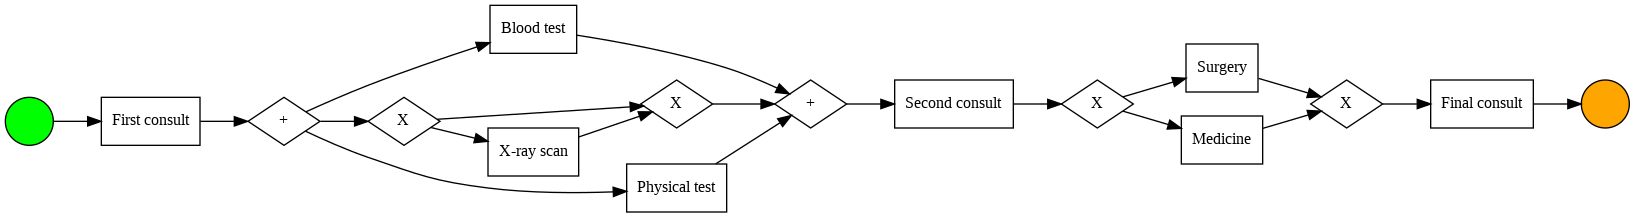

''

In [28]:
# we can convert the process tree to the bpmn
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)
pm4py.vis.save_vis_bpmn(bpmn_model, "bpmn.png")

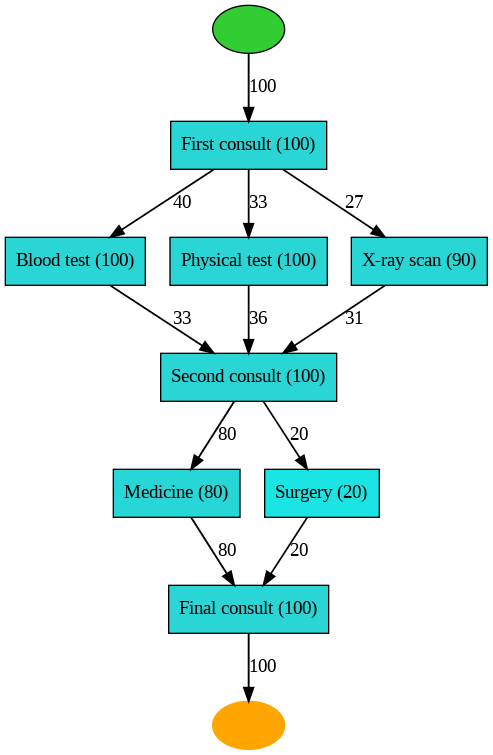

''

In [29]:
# Heuristic miner

hn = pm4py.discovery.discover_heuristics_net(log_dataframe, dependency_threshold=0.9,
                                             and_threshold=0.9, loop_two_threshold= 0.9)

pm4py.vis.view_heuristics_net(hn)
pm4py.vis.save_vis_heuristics_net(hn, "heuristics_net_frequency.png")
# by default the decorator is frequency of the event

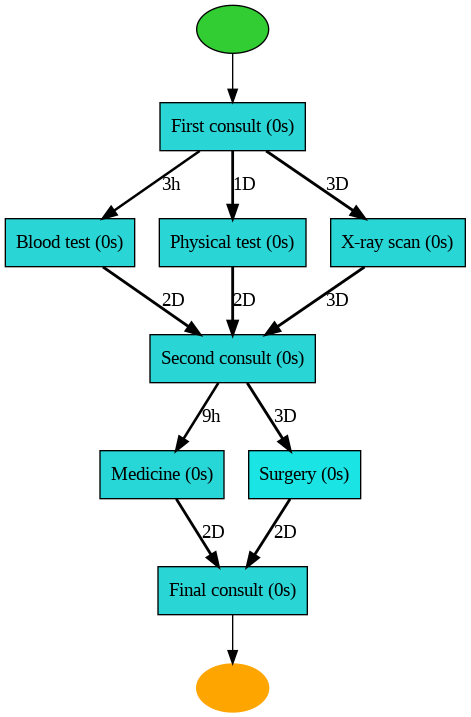

''

In [30]:
hn = pm4py.discovery.discover_heuristics_net(log_dataframe, dependency_threshold=0.9,
                                             and_threshold=0.9, loop_two_threshold= 0.9,
                                             decoration='performance')

pm4py.vis.view_heuristics_net(hn)
pm4py.vis.save_vis_heuristics_net(hn, "heuristics_net_performance.png")

## Token based replay - to observe the fitness KPI

In [32]:
# let's generate the Petri net form inductive miner
pn, im, fm = pm4py.discover_petri_net_inductive(log_dataframe)
# observe the fitness of the model by token replay method ( the most common one)
pm4py.fitness_token_based_replay(log_dataframe, pn, im, fm)

replaying log with TBR, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

## Dotted chart

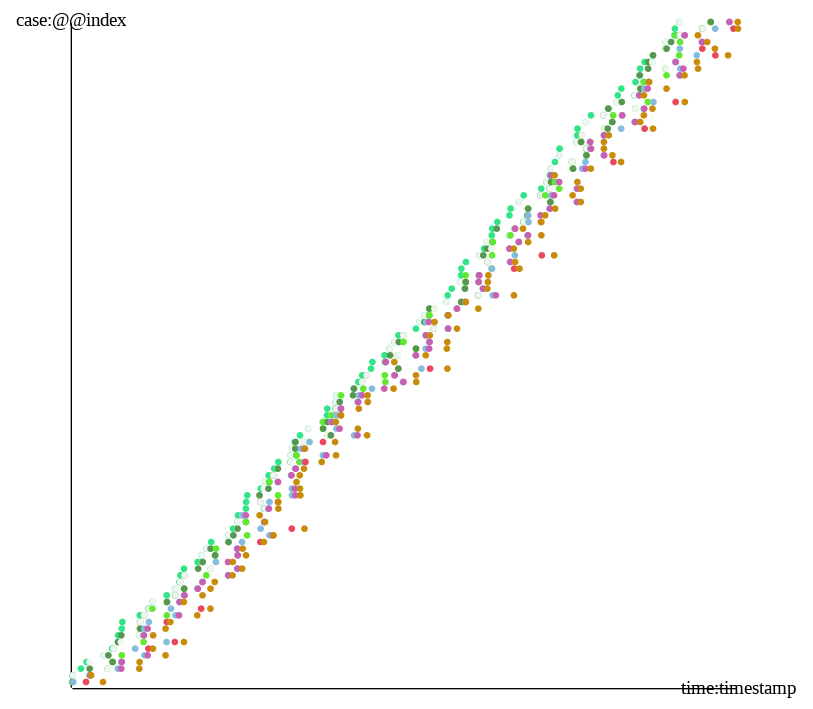

In [36]:
pm4py.vis.view_dotted_chart(log_dataframe, show_legend = False)

In [37]:
pm4py.vis.save_vis_dotted_chart(log_dataframe, "dotted_chart.png")

''